# Case 1a

In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [15]:
# Get files in the previous directory/Model Instructions
files = os.listdir('../Model Instructions')
# Get the files that are .csv
files = [file for file in files if file[-4:] == '.csv']

# Import the data as numpy
data = np.array([pd.read_csv('../Model Instructions/' + file, header=None).values for file in files])

# Read ricker.in, it is not a csv file
ricker = pd.read_csv('../Model Instructions/ricker.in', sep=' ', header=None).values

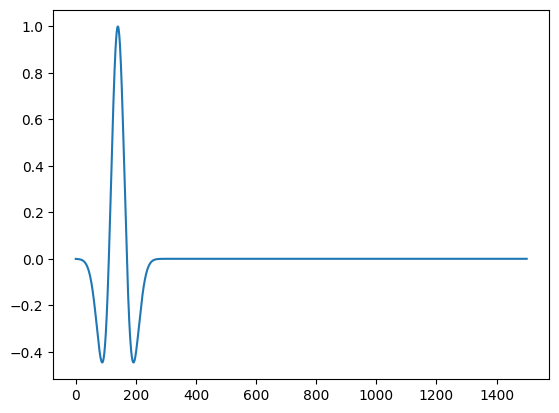

In [16]:
plt.plot(np.squeeze(ricker)[1:])

In [17]:
# Write ricker in dat format
ricker = ricker[1:]
with open('Ricker.dat', 'w') as file:
    file.write("Vs and Nu of the material\n")
    file.write(f'{len(ricker)} 0.0\n')
    np.savetxt(file, np.column_stack((ricker, 0*np.ones_like(ricker))), fmt="%e")
    file.close()

In [18]:
# From the data, select each 10th element
Vs_array = data[0]

# Get Median column index
num_cols = Vs_array.shape[1]  # get the number of columns
median_col_index = num_cols // 2  # find the index of the median column

# extract the median column
central_range = 2
Vs_array = Vs_array[:, median_col_index-2:median_col_index+2]
print(Vs_array.shape)
print(np.min(Vs_array), np.max(Vs_array))

(30, 1)
140 140


In [19]:
# Number of elements per direction
nx = Vs_array.shape[1]
ny = Vs_array.shape[0]

# Size of the elements
dx = 5
dy = 5

# Length of the model
Lx = nx*dx
Ly = ny*dy

# Create the mesh of the center points
x = np.linspace(Lx-dx/2, dx/2, nx)
y = np.linspace(Ly-dy/2, dy/2, ny)
print(x.shape, y.shape)
print(x, y)

(1,) (30,)
[2.5] [147.5 142.5 137.5 132.5 127.5 122.5 117.5 112.5 107.5 102.5  97.5  92.5
  87.5  82.5  77.5  72.5  67.5  62.5  57.5  52.5  47.5  42.5  37.5  32.5
  27.5  22.5  17.5  12.5   7.5   2.5]


In [20]:
# Create a meshgrid
X, Y = np.meshgrid(x, y)
xx = X.flatten()
yy = Y.flatten()
Vs = Vs_array.flatten()
print(xx.shape, yy.shape, Vs.shape)

(30,) (30,) (30,)


In [21]:
# Concatenate the arrays
data = np.column_stack((xx, yy, Vs))

# Attach the Poisson's ratio and density
nu = 0.3
rho = 2000
data = np.column_stack((data, nu*np.ones_like(Vs), rho*np.ones_like(Vs)))
data

array([[2.500e+00, 1.475e+02, 1.400e+02, 3.000e-01, 2.000e+03],
       [2.500e+00, 1.425e+02, 1.400e+02, 3.000e-01, 2.000e+03],
       [2.500e+00, 1.375e+02, 1.400e+02, 3.000e-01, 2.000e+03],
       [2.500e+00, 1.325e+02, 1.400e+02, 3.000e-01, 2.000e+03],
       [2.500e+00, 1.275e+02, 1.400e+02, 3.000e-01, 2.000e+03],
       [2.500e+00, 1.225e+02, 1.400e+02, 3.000e-01, 2.000e+03],
       [2.500e+00, 1.175e+02, 1.400e+02, 3.000e-01, 2.000e+03],
       [2.500e+00, 1.125e+02, 1.400e+02, 3.000e-01, 2.000e+03],
       [2.500e+00, 1.075e+02, 1.400e+02, 3.000e-01, 2.000e+03],
       [2.500e+00, 1.025e+02, 1.400e+02, 3.000e-01, 2.000e+03],
       [2.500e+00, 9.750e+01, 1.400e+02, 3.000e-01, 2.000e+03],
       [2.500e+00, 9.250e+01, 1.400e+02, 3.000e-01, 2.000e+03],
       [2.500e+00, 8.750e+01, 1.400e+02, 3.000e-01, 2.000e+03],
       [2.500e+00, 8.250e+01, 1.400e+02, 3.000e-01, 2.000e+03],
       [2.500e+00, 7.750e+01, 1.400e+02, 3.000e-01, 2.000e+03],
       [2.500e+00, 7.250e+01, 1.400e+02,

In [22]:
# Create FLAC files
with open('MatProp3D.dat', 'w') as file:
    file.write("Vs and Nu of the material\n")
    file.write(f'{len(Vs)} 0.0\n')
    np.savetxt(file, np.column_stack((Vs, nu*np.ones_like(Vs))), fmt="%e")
    file.close()

with open('Density3D.dat', 'w') as file:
    file.write("Vs and Density of the material\n")
    file.write(f'{len(Vs)} 0.0\n')
    np.savetxt(file, np.column_stack((Vs, rho*np.ones_like(Vs) )) , fmt="%e")
    file.close()

with open('Coord3D-XY.dat', 'w') as file:
    file.write("X-Y Coordinates of Zones' Centroids\n")
    file.write(f'{len(xx)} 0.0\n')
    np.savetxt(file, np.column_stack((xx, yy)), fmt="%e")
    file.close()

In [23]:
# Write the whole Geometry.dat file
with open('Geometry2D.dat', 'w') as file:
	file.write('model new\n')
	file.write('model configure dynamic\n')
	file.write('zone create quad size {:.0f} {:.0f} point 0 (0,0) point 1 ({:.2f},0) point 2 (0,{:.2f})\n'.format(nx,ny,Lx,Ly))
	file.write('zone cmodel assign elastic\n')
	file.write(';------------------------------------------------\n')
	file.write(';--------Define the material properties-----------\n')
	file.write(';------------------------------------------------\n')
	file.write("table '10' import 'Coord3D-XY.dat'\n")
	file.write("table '20' import 'MatProp3D.dat'\n")
	file.write("table '21' import 'Density3D.dat'\n")
	file.write("fish define soilprop\n")
	file.write("\tmtot = table.size(10)\n")
	file.write("\tloop m (1,mtot)\n")
	file.write("\t\txi = table.x(10,m)\n")
	file.write("\t\tyi = table.y(10,m)\n")
	file.write("\t\tcsi = table.x(20,m)\n")
	file.write("\t\tnui = table.y(20,m)\n")
	file.write("\t\trho = table.y(21,m)\n")
	file.write("\t\tshmodi = rho*csi^2\n")
	file.write("\t\tbkmodi = 2*shmodi*(1+nui)/3/(1-2*nui)\n")
	file.write("\t\tdout = string(m)+ ',  ' + string(csi) + ',  ' + string(nui)\n")
	file.write("\t\tdum = io.out(dout)\n")
	file.write("\t\t; \n")
	file.write("\t\tzcent = vector(xi,yi)\n")
	file.write("\t\tzp = zone.near(zcent)\n")
	file.write("\t\tzone.density(zp) = rho\n")
	file.write("\t\tzone.prop(zp,'shear') = shmodi\n")
	file.write("\t\tzone.prop(zp,'bulk') = bkmodi\n")
	file.write("\t\t; \n")
	file.write("\tendloop\n")
	file.write("end\n")
	file.write("@soilprop\n")
	file.write("; ------------------------------------------------\n")
	file.write("model save 'Model_1a_Geom.sav'\n")
	file.close()